<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Uber_logo_2018.svg/1024px-Uber_logo_2018.svg.png" alt="UBER LOGO" width="50%" />

# UBER Pickups 

## Company's Description 📇

<a href="http://uber.com/" target="_blank">Uber</a> is one of the most famous startup in the world. It started as a ride-sharing application for people who couldn't afford a taxi. Now, Uber expanded its activities to Food Delivery with <a href="https://www.ubereats.com/fr-en" target="_blank">Uber Eats</a>, package delivery, freight transportation and even urban transportation with <a href="https://www.uber.com/fr/en/ride/uber-bike/" target="_blank"> Jump Bike</a> and <a href="https://www.li.me/" target="_blank"> Lime </a> that the company funded. 


The company's goal is to revolutionize transportation accross the globe. It operates now on about 70 countries and 900 cities and generates over $14 billion revenue! 😮


## Project 🚧

One of the main pain point that Uber's team found is that sometimes drivers are not around when users need them. For example, a user might be in San Francisco's Financial District whereas Uber drivers are looking for customers in Castro.  

(If you are not familiar with the bay area, check out <a href="https://www.google.com/maps/place/San+Francisco,+CA,+USA/@37.7515389,-122.4567213,13.43z/data=!4m5!3m4!1s0x80859a6d00690021:0x4a501367f076adff!8m2!3d37.7749295!4d-122.4194155" target="_blank">Google Maps</a>)

Eventhough both neighborhood are not that far away, users would still have to wait 10 to 15 minutes before being picked-up, which is too long. Uber's research shows that users accept to wait 5-7 minutes, otherwise they would cancel their ride. 

Therefore, Uber's data team would like to work on a project where **their app would recommend hot-zones in major cities to be in at any given time of day.**  

## Goals 🎯

Uber already has data about pickups in major cities. Your objective is to create algorithms that will determine where are the hot-zones that drivers should be in. Therefore you will:

* Create an algorithm to find hot zones 
* Visualize results on a nice dashboard 

## Scope of this project 🖼️

To start off, Uber wants to try this feature in New York city. Therefore you will only focus on this city. Data can be found here: 

👉👉<a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/Projects/uber-trip-data.zip" target="_blank"> Uber Trip Data</a> 👈👈

**You only need to focus on New York City for this project**

## Helpers 🦮

To help you achieve this project, here are a few tips that should help you: 

### Clustering is your friend 

Clustering technics are a perfect fit for the job. Think about it, all the pickup locations can be gathered into different clusters. You can then use **cluster coordinates to pin hot zones** 😉
    

### Create maps with `plotly` 

Check out <a href="https://plotly.com/" target="_blank">Plotly</a> documentation, you can create maps and populate them easily. Obviously, there are other libraries but this one should do the job pretty well. 


### Start small grow big 

Eventhough Uber wants to have hot-zones per hour and per day of week, you should first **start small**. Pick one day at a given hour and **then start to generalize** your approach. 

## Deliverable 📬

To complete this project, your team should: 

* Have a map with hot-zones using any python library (`plotly` or anything else). 
* You should **at least** describe hot-zones per day of week. 
* Compare results with **at least** two unsupervised algorithms like KMeans and DBScan. 

Your maps should look something like this: 

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/Clusters_uber_pickups.png" alt="Uber Cluster Map" />

# Importer de données

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.offline import plot

In [2]:
url ="https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-apr14.csv"
df_apr = pd.read_csv(url)
df_apr.head()

Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512

In [3]:
df_viz = df_apr.copy()

In [4]:
df_viz['Date_Time'] = pd.to_datetime(df_viz['Date/Time'])
df_viz = df_viz.drop(["Date/Time"], axis = 1)
df_viz.head(5)

Lat      Lon    Base           Date_Time
0  40.7690 -73.9549  B02512 2014-04-01 00:11:00
1  40.7267 -74.0345  B02512 2014-04-01 00:17:00
2  40.7316 -73.9873  B02512 2014-04-01 00:21:00
3  40.7588 -73.9776  B02512 2014-04-01 00:28:00
4  40.7594 -73.9722  B02512 2014-04-01 00:33:00

In [5]:
df_viz['hour'] = df_viz['Date_Time'].dt.hour
df_viz['minute'] = df_viz['Date_Time'].dt.minute
df_viz['quarter'] = df_viz['Date_Time'].dt.quarter
df_viz['month'] = df_viz['Date_Time'].dt.month
df_viz['year'] = df_viz['Date_Time'].dt.year
df_viz['day_of_year'] = df_viz['Date_Time'].dt.dayofyear
df_viz['day_of_month'] = df_viz['Date_Time'].dt.day
df_viz['week_of_year'] = df_viz['Date_Time'].dt.weekofyear
df_viz['day_name'] = df_viz['Date_Time'].dt.day_name()
df_viz['month_name'] = df_viz['Date_Time'].dt.month_name()
df_viz.head(2)

<ipython-input-5-5f1c439055af>:8: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



Lat      Lon    Base           Date_Time  hour  minute  quarter  month  \
0  40.7690 -73.9549  B02512 2014-04-01 00:11:00     0      11        2      4   
1  40.7267 -74.0345  B02512 2014-04-01 00:17:00     0      17        2      4   

   year  day_of_year  day_of_month  week_of_year day_name month_name  
0  2014           91             1            14  Tuesday      April  
1  2014           91             1            14  Tuesday      April

# Machine Learning

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import MiniBatchKMeans, KMeans, DBSCAN
from sklearn.metrics import  silhouette_score

In [7]:
df_most = df_viz[(df_viz['week_of_year'] == 18) & (df_viz['day_name'] == "Wednesday")]
df_most.head(5)

Lat      Lon    Base           Date_Time  hour  minute  quarter  \
33350  40.7685 -73.9581  B02512 2014-04-30 00:02:00     0       2        2   
33351  40.6444 -73.7823  B02512 2014-04-30 00:02:00     0       2        2   
33352  40.7715 -73.9825  B02512 2014-04-30 00:03:00     0       3        2   
33353  40.6799 -73.9075  B02512 2014-04-30 00:11:00     0      11        2   
33354  40.7198 -73.9858  B02512 2014-04-30 00:12:00     0      12        2   

       month  year  day_of_year  day_of_month  week_of_year   day_name  \
33350      4  2014          120            30            18  Wednesday   
33351      4  2014          120            30            18  Wednesday   
33352      4  2014          120            30            18  Wednesday   
33353      4  2014          120            30            18  Wednesday   
33354      4  2014          120            30            18  Wednesday   

      month_name  
33350      April  
33351      April  
33352      April  
33353      April  
33354      April

In [8]:
usefull_cols = ["Lat", "Lon", "hour", "minute"]
df1 = df_most[usefull_cols]
df1.head(5)

Lat      Lon  hour  minute
33350  40.7685 -73.9581     0       2
33351  40.6444 -73.7823     0       2
33352  40.7715 -73.9825     0       3
33353  40.6799 -73.9075     0      11
33354  40.7198 -73.9858     0      12

In [9]:
df1.shape

(36251, 4)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36251 entries, 33350 to 564515
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Lat     36251 non-null  float64
 1   Lon     36251 non-null  float64
 2   hour    36251 non-null  int64  
 3   minute  36251 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 1.4 MB


In [11]:
#.sample(frac=0.06, replace=True, random_state=0)
df2 = df1.copy()
df2.head(5)

Lat      Lon  hour  minute
33350  40.7685 -73.9581     0       2
33351  40.6444 -73.7823     0       2
33352  40.7715 -73.9825     0       3
33353  40.6799 -73.9075     0      11
33354  40.7198 -73.9858     0      12

In [12]:
fig = px.density_heatmap(df2, x="Lat", y="Lon", marginal_x="histogram", marginal_y="histogram", 
                            color_continuous_scale=px.colors.sequential.Rainbow,
                            labels={"Lon": "Longitude", "Lat": "Latitude"},
                            range_x = [40.6, 40.9], range_y = [-74.1, -73.7])
fig.update_xaxes(title_font=dict(family = "Arial", size = 16, color = "black"))
fig.update_yaxes(title_font=dict(family = "Arial", size = 16, color = "black"))
fig.show()

![map](https://raw.githubusercontent.com/huynam1012/Projet_jedha/main/fig8.png)

In [13]:
# Création du pipeline pour les variables quantitatives
numeric_features = [0, 1] # Positions des colonnes quantitatives dans X
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()) # pour normaliser les variables
])

# Création du pipeline pour les variables catégorielles
categorical_features = [] # Positions des colonnes catégorielles dans X
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) # on encode les catégories sous forme de colonnes comportant des 0 et des 1
    ])

# On combine les pipelines dans un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [14]:
# Preprocessings sur le dataset
print("Preprocessing sur le train set...")
print(df2.head())
X = preprocessor.fit_transform(df2) # fit_transform !!
print('...Terminé.')
print(X[0:5, :])
print()

Preprocessing sur le train set...
           Lat      Lon  hour  minute
33350  40.7685 -73.9581     0       2
33351  40.6444 -73.7823     0       2
33352  40.7715 -73.9825     0       3
33353  40.6799 -73.9075     0      11
33354  40.7198 -73.9858     0      12
...Terminé.
[[ 0.79059125  0.50955073]
 [-3.1747231   4.68721289]
 [ 0.88644897 -0.07028407]
 [-2.04040675  1.71199501]
 [-0.76549908 -0.14870435]]



In [15]:
X.shape

(36251, 2)

Le but de mon projet est de créer une recommandation d'application des zones chaudes à New York pour une journée de 24 heures.

Pour cela, je vais utiliser 2 différentes méthodes de clustering afin de déterminer les zones chaudes : DBSCAN et K-means.

## DBSCAN

Density-Based Spatial Clustering of Applications with Noise.

J'utiliserai la métric "euclidienne" qui coupe en diagonale un bâtiment à un autre elle nous donnerait une estimation réaliste. Contrairement à la métric "manhattan" qui est plus à même de répondre à nos besoins qui place 2 points sur le sommet diagonal d'un carré et prend la distance égale à la moitié du périmètre.

In [16]:
#https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan
#https://kneed.readthedocs.io/en/stable/parameters.html
#https://www.kaggle.com/kevinarvai/knee-elbow-point-detection
#https://github.com/arvkevi/kneed
#!pip install kneed -q

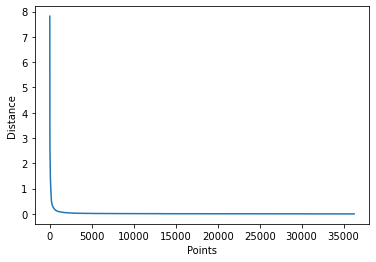

In [17]:
from sklearn.neighbors import NearestNeighbors

neighbors = 6

nbrs = NearestNeighbors(n_neighbors = neighbors).fit(X)
distances, indices = nbrs.kneighbors(X)
distance_desc = sorted(distances[:,neighbors-1], reverse=True)
plt.plot(list(range(1,len(distance_desc )+1)), distance_desc)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()

In [18]:
from kneed import KneeLocator
kneedle = KneeLocator(range(1,len(distance_desc)+1),  #x values
                      distance_desc, # y values
                      S=1.0, #parameter suggested from paper
                      curve="convex", #parameter from figure
                      direction="decreasing") #parameter from figure

0.4997049374624799


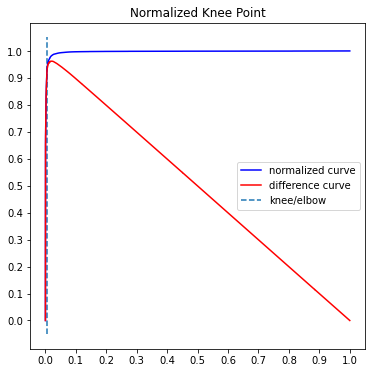

In [19]:
kneedle.plot_knee_normalized()
value = kneedle.knee_y
print(value)

In [20]:
db_euclidean = DBSCAN(eps=0.5, min_samples=8, metric="euclidean", algorithm="brute",  n_jobs=2)
db_euclidean.fit(X)

DBSCAN(algorithm='brute', min_samples=8, n_jobs=2)

In [21]:
df2["cluster_euclidean"] = db_euclidean.labels_
#df2["cluster_euclidean"] = db_euclidean.fit_predict(X) #return cluster labels.
df2.head()

Lat      Lon  hour  minute  cluster_euclidean
33350  40.7685 -73.9581     0       2                  0
33351  40.6444 -73.7823     0       2                  0
33352  40.7715 -73.9825     0       3                  0
33353  40.6799 -73.9075     0      11                  0
33354  40.7198 -73.9858     0      12                  0

In [22]:
np.unique(db_euclidean.labels_)
# catégorie -1 est outlier

array([-1,  0,  1,  2,  3,  4], dtype=int64)

In [23]:
db_euclidean.components_

array([[ 0.79059125,  0.50955073],
       [-3.1747231 ,  4.68721289],
       [ 0.88644897, -0.07028407],
       ...,
       [ 0.01733897, -0.22237188],
       [-2.17780282,  0.92779222],
       [-1.78159091,  0.44538868]])

In [24]:
fig = px.scatter_mapbox(df2[df2["cluster_euclidean"] != -1], lat="Lat", lon="Lon", zoom = 9, 
                        color="cluster_euclidean", width=600, height=500,
                        animation_frame = "hour",
                        mapbox_style="carto-positron", color_continuous_scale=px.colors.sequential.Rainbow)

fig.update_layout(coloraxis_colorbar=dict(title="Euclidienne"))
fig.show()
plot(fig, show_link = True, filename = "Euclidienne.html")

'Euclidienne.html'

![fig9](https://raw.githubusercontent.com/huynam1012/Projet_jedha/main/fig9.png)

In [25]:
db_manhattan = DBSCAN(eps=0.5, min_samples=8, metric="manhattan", algorithm="brute",  n_jobs=2)
db_manhattan.fit(X)

DBSCAN(algorithm='brute', metric='manhattan', min_samples=8, n_jobs=2)

In [26]:
df2["cluster_manhattan"] = db_manhattan.labels_
df2.head()

Lat      Lon  hour  minute  cluster_euclidean  cluster_manhattan
33350  40.7685 -73.9581     0       2                  0                  0
33351  40.6444 -73.7823     0       2                  0                  1
33352  40.7715 -73.9825     0       3                  0                  0
33353  40.6799 -73.9075     0      11                  0                  0
33354  40.7198 -73.9858     0      12                  0                  0

In [27]:
np.unique(db_manhattan.labels_)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

In [28]:
db_manhattan.components_

array([[ 0.79059125,  0.50955073],
       [-3.1747231 ,  4.68721289],
       [ 0.88644897, -0.07028407],
       ...,
       [ 0.01733897, -0.22237188],
       [-2.17780282,  0.92779222],
       [-1.78159091,  0.44538868]])

In [29]:
fig = px.scatter_mapbox(df2[df2["cluster_manhattan"] != -1], lat="Lat", lon="Lon", zoom = 9, 
                        color="cluster_manhattan", width=600, height=500,
                        animation_frame = "hour",
                        mapbox_style="carto-positron", color_continuous_scale=px.colors.sequential.Rainbow)

fig.update_layout(coloraxis_colorbar=dict(title="Manhattan"))
fig.show()
plot(fig, show_link = True, filename = "Manhattan.html")


'Manhattan.html'

![fig10](https://raw.githubusercontent.com/huynam1012/Projet_jedha/main/fig10.png)

* DBSCAN considère Manhattan et Brooklyn du nord comme la zone la plus chaude avec un seul cluster très densitée tandis que les autres parties du New York sont comme comme des outliers. 

## K-means

J'utilise  la méthode K-Means qui est une technique qui sépare les observations par clusters où chaque observation est considérée comme appartenant à un groupe où la moyenne est la plus proche selon une distance donnée.

Pour savoir le nombre de clusters je vais utiliser la méthode du Elbow et de la Silhouette.

In [30]:
X.shape

(36251, 2)

### Elbow method

In [31]:
%%time
wcss =  []
k = []
for i in range (2, 8): 
    minikmeans = MiniBatchKMeans(n_clusters= i, init = "k-means++", random_state = 0)
    minikmeans.fit(X)
    k.append(i)
    wcss.append(minikmeans.inertia_)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))

WCSS for K=2 --> 53415.16475391428
WCSS for K=3 --> 34358.03855081729
WCSS for K=4 --> 29085.80219692858
WCSS for K=5 --> 26016.178642550458
WCSS for K=6 --> 21866.889337926423
WCSS for K=7 --> 17431.827839159036
Wall time: 3.55 s


In [32]:
# Create DataFrame
wcss_frame = pd.DataFrame(wcss)
k_frame = pd.Series(k)

In [33]:
# Create figure
fig = px.line(
    wcss_frame,
    x = k_frame,
    y = wcss_frame.iloc[:,-1]
)

# Create title and axis labels
fig.update_layout(
    yaxis_title = "Inertia",
    xaxis_title = "Nombre de clusters",
    title = "Inertia per cluster"
)

# Render
#fig.show(renderer="notebook")
#fig.show(renderer="iframe") # if using workspace

![fig11](https://raw.githubusercontent.com/huynam1012/Projet_jedha/main/fig11.png)

### Silhouette

In [34]:
%%time
sil = []
k = []

## Careful, you need to start at i=2 as silhouette score cannot accept less than 2 labels 
for i in range (2,8): 
    minikmeans = MiniBatchKMeans(n_clusters= i, init = "k-means++", random_state = 0)
    minikmeans.fit(X)
    sil.append(silhouette_score(X, minikmeans.predict(X)))
    k.append(i)
    print("Silhouette score for K={} is {}".format(i, sil[-1]))

Silhouette score for K=2 is 0.4054080956040789
Silhouette score for K=3 is 0.4433396205161595
Silhouette score for K=4 is 0.34364864575958903
Silhouette score for K=5 is 0.34318535430899977
Silhouette score for K=6 is 0.35251851513486304
Silhouette score for K=7 is 0.3982067176566587
Wall time: 1min 56s


In [35]:
# Create a data frame 
cluster_scores = pd.DataFrame(sil)
k_frame = pd.Series(k)

# Create figure
fig = px.bar(data_frame = cluster_scores,  
             x = k_frame, 
             y = cluster_scores.iloc[:, -1]
            )

# Add title and axis labels
fig.update_layout(
    yaxis_title = "Silhouette Score",
    xaxis_title = "Nombre de clusters",
    title = "Silhouette Score per cluster"
)

# Render
#fig.show(renderer="notebook")
#fig.show(renderer="iframe") # if using workspace

![fig12](https://raw.githubusercontent.com/huynam1012/Projet_jedha/main/fig12.png)

La méthode d'Elbow essaie de voir si chaque point de données d'un cluster sont proches les uns des autres .
La Silhouette essaie de déterminer à quelle distance se trouve chaque groupe (et donc à quel point ils sont significatifs).

Grâce à c'est deux méthodes je vais moonstrer les résulats avec 5 clusters.

In [36]:
minikmeans_5 = MiniBatchKMeans(n_clusters = 5, init = "k-means++", random_state = 0)
minikmeans_5.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=0)

In [37]:
df2["Cluster_KMeans_5"] = minikmeans_5.predict(X)
df2["Cluster_KMeans_5"] = df2["Cluster_KMeans_5"].astype('str')

In [38]:
df2.head(2)

Lat      Lon  hour  minute  cluster_euclidean  cluster_manhattan  \
33350  40.7685 -73.9581     0       2                  0                  0   
33351  40.6444 -73.7823     0       2                  0                  1   

      Cluster_KMeans_5  
33350                0  
33351                3

In [39]:
fig = px.scatter_mapbox(df2, lat="Lat", lon="Lon", color="Cluster_KMeans_5", zoom = 9, width=800, height=500,
                        color_discrete_sequence = px.colors.qualitative.G10,
                        animation_frame = "hour",
                        category_orders={"Cluster_KMeans_5": ["0", "1", "2", "3", "4"]})
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(legend = dict(font = dict(family = "Arial", size = 16, color = "black")),
                  legend_title = dict(font = dict(family = "Arial", size = 16, color = "black")))
fig.show()
plot(fig, show_link = True, filename = "cluster_kmean_5.html")

'cluster_kmean_5.html'

![fig14](https://raw.githubusercontent.com/huynam1012/Projet_jedha/main/fig14.png)

* Le model K-Means a permit d'identifier 5 clusters en mettant en évidence les différentes zones chaudes.
* Manhattan est la zone la plus chaude qui est divisée en 3 zones différentes : nord, centre et sud. 
* Brookklyn et Queens correspondent à d'autres clusters et les points sont moins concentrés.
* Les trajets sont très peu entre 0 h et 4h dans tous les zones.

# Conclusion

Le model DBSCAN permet d'identifier la zone de densité la plus élevée à New York tandis que le model K-mean nous permet de diviser cette zone en une autre petites zones afin que le chauffeur peuvent récupérer le client plus rapidement 